# 2020 U.S. Presidential Voter Intentions Analysis

During the 2020 U.S. presidential election, voter intentions became a major point of discussion. Many Americans chose not to vote, citing logistical barriers, a lack of trust in the electoral system, and dissatisfaction with the candidates. Conversely, some voters felt more motivated than ever, perceiving the stakes as personal or wishing to avoid potential regret. Various demographic groups, particularly younger voters and those from lower-income backgrounds, faced significant obstacles to voting. More details can be found at [FiveThirtyEight's Non-Voters Poll](https://projects.fivethirtyeight.com/non-voters-poll-2020-election/).

This analysis aims to explore the factors influencing voter participation, highlighting key trends and insights from the data to better understand voter behavior in the 2020 election. The data source is available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/non-voters).

## Analysis Index
1. Knowing the data structure
2. Knowing interviewers' characteristics
   - 2.1 Race vs. Income
   - 2.2 Education vs. Income Categories
3. General points based on the answers
4. Democrats vs. Republicans
5. What is considered a good American?
   - 5.1 Displaying the American flag
   - 5.2 Believing in God

<h3>1) Knowing the data</h3>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('nonvoters_data.csv')
df.head(5)

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [197]:
df.shape

(5836, 119)

In [198]:
df.columns.values

array(['RespId', 'weight', 'Q1', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5',
       'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q3_1', 'Q3_2', 'Q3_3',
       'Q3_4', 'Q3_5', 'Q3_6', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5',
       'Q4_6', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5',
       'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4',
       'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q11_1', 'Q11_2', 'Q11_3',
       'Q11_4', 'Q11_5', 'Q11_6', 'Q14', 'Q15', 'Q16', 'Q17_1', 'Q17_2',
       'Q17_3', 'Q17_4', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5',
       'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q19_1', 'Q19_2',
       'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q19_9',
       'Q19_10', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27_1',
       'Q27_2', 'Q27_3', 'Q27_4', 'Q27_5', 'Q27_6', 'Q28_1', 'Q28_2',
       'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q29_1',
       'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8',
 

All the answers are numbered based, following the pdf layout on GitHub's link. <br>
If a question header is followed by underline and another number, means a subquestion.<br>
&emsp;For example, the 2nd question (Q2) is about how important each subquestion is to being considered a good American.<br>
&emsp;Than, the first subquestion, Q2_1, is voting in elections, which can receive a answer from 1 to 4, which 1 is very important, and 4 is not at all important.<br>
&emsp;This answer scale can changes for each question.<br>
Some questions only are asked for some given former answer.

<hr>

<h3>2. Sample characteristics</h3>

In [112]:
# age information
df['ppage'].describe().astype(int)

count    5836
mean       51
std        17
min        22
25%        36
50%        54
75%        65
max        94
Name: ppage, dtype: int32

In [40]:
# education level, race, gender, income category and voter category informations:
educ=df['educ'].value_counts(normalize=True).round(2).to_dict()
df_educ = pd.DataFrame([educ]).T.reset_index()
race=df['race'].value_counts(normalize=True).round(2).to_dict()
df_race = pd.DataFrame([race]).T.reset_index()
gender=df['gender'].value_counts(normalize=True).round(2).to_dict()
df_gender = pd.DataFrame([gender]).T.reset_index()
income_cat=df['income_cat'].value_counts(normalize=True).round(2).to_dict()
df_income_cat = pd.DataFrame([income_cat]).T.reset_index()
voter_category=df['voter_category'].value_counts(normalize=True).round(2).to_dict()
df_voter_category = pd.DataFrame([voter_category]).T.reset_index()

df_characteristics= pd.DataFrame()
df_characteristics = pd.concat([df_educ,df_characteristics,df_race,df_gender,df_income_cat,df_voter_category],axis=1,ignore_index=True)
df_characteristics.rename(columns={ 0:'Educational_level',1:'%',2:'Race',3:'%',4:'Gender',5:'%',
                                    6:'Income_group',7:'%',8:'Voter_category',9:'%' },
                          inplace=True)
df_characteristics

,Educational_level,%,Race,%,Gender,%,Income_group,%,Voter_category,%
0,College,0.40,White,0.64,Male,0.5,$75-125k,0.28,sporadic,0.44
1,High school or less,0.31,Black,0.16,Female,0.5,Less than $40k,0.24,always,0.31
2,Some college,0.29,Hispanic,0.14,NaN,NaN,$40-75k,0.24,rarely/never,0.25
3,NaN,NaN,Other/Mixed,0.07,NaN,NaN,$125k or more,0.24,NaN,NaN


The sample has 5.839 individuals (lines) with age average of 51 years old and well distributed.<br>Gender and education are nearly equal distributed, 63% are white, 44% vote sporadically, 31% vote always and 25% vote rarely/never

<h3>1.1 Race x income categories</h3>

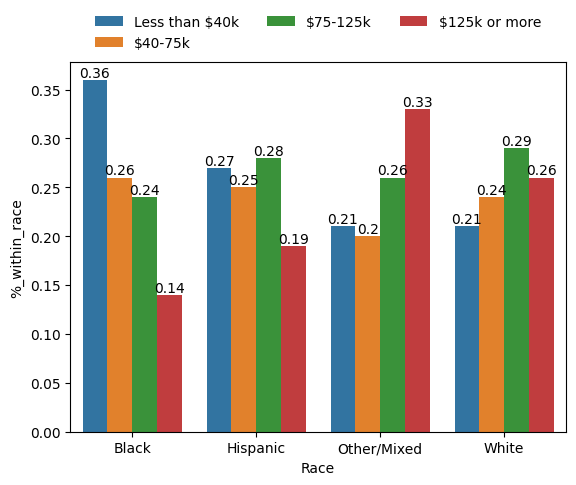

In [6]:
df_race_income_valuecounts=pd.DataFrame()
df_race_income_valuecounts = df[['race','income_cat']].value_counts().reset_index()
df_race_income_valuecounts = df_race_income_valuecounts.merge(df_race_income_valuecounts.groupby('race')['count'].sum(),on='race')
df_race_income_valuecounts.rename(columns={ 'count_x':'Count', 
                                            'count_y':'Total_count_race',
                                            'race':'Race',
                                            'income_cat': 'Income_category',
                                            'count':'Count'},inplace=True)
df_race_income_valuecounts['%_within_race'] = (df_race_income_valuecounts['Count'] / df_race_income_valuecounts['Total_count_race']).round(2)
df_race_income_valuecounts.sort_values(by='Race',inplace=True)

p1 = sns.barplot(data=df_race_income_valuecounts, x='Race', y='%_within_race', hue='Income_category')
sns.move_legend(
    p1, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for p in p1.containers:
    p1.bar_label(p, label_type='edge')

<h3>1.2 Education x income categories</h3>

- Who is income distribution among educational level?

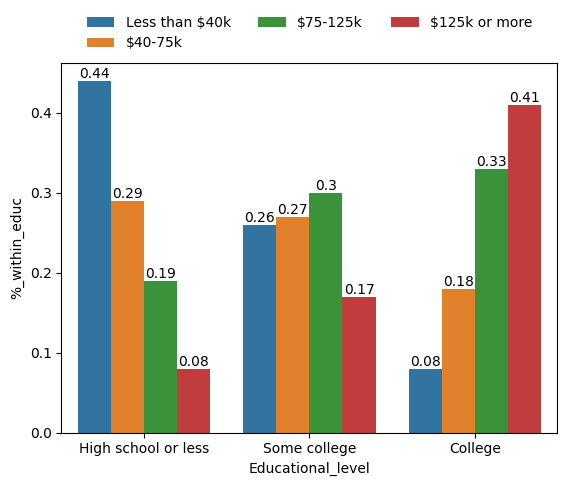

In [80]:
df_educ_income_valuecounts = df[['educ','income_cat']].value_counts().reset_index()
df_educ_income_valuecounts = df_educ_income_valuecounts.merge(df_educ_income_valuecounts.groupby('educ')['count'].sum(),on='educ')
df_educ_income_valuecounts.rename(columns={'count_x': 'Count', 
                                           'count_y':'Total_educ',
                                           'educ':'Educational_level',
                                           'income_cat': 'Income_category'},inplace=True)
education_order = ['High school or less', 'Some college', 'College']
df_educ_income_valuecounts['Educational_level'] = pd.Categorical(df_educ_income_valuecounts['Educational_level'], categories=education_order, ordered=True)
df_educ_income_valuecounts['%_within_educ'] = (df_educ_income_valuecounts['Count']/df_educ_income_valuecounts['Total_educ']).round(2)
income_cat_order = ['Less than $40k', '$40-75k', '$75-125k', '$125k or more']
df_educ_income_valuecounts['Income_category'] = pd.Categorical(df_educ_income_valuecounts['Income_category'], categories=income_cat_order, ordered=True)

p2 = sns.barplot(data=df_educ_income_valuecounts, x='Educational_level', y='%_within_educ', hue='Income_category')
sns.move_legend(
    p2, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for p in p2.containers:
    p2.bar_label(p, label_type='edge')

<hr>

<h3>2. General points based on the answers:</h3>

- The voters were divided into always/sporadic/rarely-never voters.<br>How are their distribution among educational level?

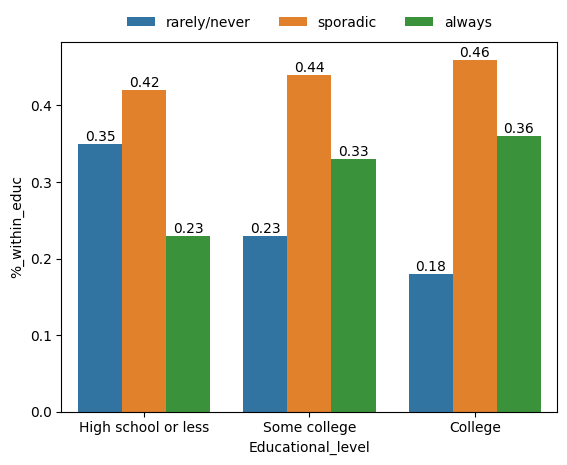

In [81]:
df_educ_voter_valuecounts = df[['educ','voter_category']].value_counts().reset_index()
df_educ_voter_valuecounts = df_educ_voter_valuecounts.merge(df_educ_voter_valuecounts.groupby('educ')['count'].sum(),on='educ')
df_educ_voter_valuecounts.rename(columns={'count_x': 'Count', 'count_y':'Total_educ',
                                          'educ':'Educational_level', 'voter_category': 'Voter_category'},inplace=True)
df_educ_voter_valuecounts['%_within_educ'] = (df_educ_voter_valuecounts['Count']/df_educ_voter_valuecounts['Total_educ']).round(2)
education_order = ['High school or less', 'Some college', 'College']
df_educ_voter_valuecounts['Educational_level'] = pd.Categorical(df_educ_voter_valuecounts['Educational_level'], categories=education_order, ordered=True)
voter_freq_order = ['rarely/never','sporadic','always']
df_educ_voter_valuecounts['Voter_category'] = pd.Categorical(df_educ_voter_valuecounts['Voter_category'], categories=voter_freq_order, ordered=True)

p3 = sns.barplot(data=df_educ_voter_valuecounts, x='Educational_level', y='%_within_educ', hue='Voter_category')
sns.move_legend(
    p3, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for p in p3.containers:
    p3.bar_label(p, label_type='edge')

- Does it matter who will win the election based on the country issues? How is the opinion by party preference?

In [89]:
df_perspective = df[['Q30','Q5']].value_counts().round(2).reset_index()
df_perspective['Q5'] = np.where (df_perspective['Q5'] == 1, 'Who wins the election matters',
                        np.where(df_perspective['Q5'] == 2, 'Things will be pretty much the same',
                        np.where(df_perspective['Q5'] == -1, 'NA','')))
df_perspective['Q30'] =  np.where(df_perspective['Q30']==1,'Republican',
                            np.where(df_perspective['Q30']==2,'Democrat',
                            np.where(df_perspective['Q30']==3,'Independent',
                            np.where(df_perspective['Q30']==4,'Another party',
                            np.where(df_perspective['Q30']==5,'No preference',
                            np.where(df_perspective['Q30']==-1,'NA',''))))))

df_perspective = df_perspective.merge(df_perspective.groupby('Q30')['count'].sum(),on='Q30')
df_perspective.rename(columns={'count_x': 'Count', 'count_y':'Total_count_party',
                              'Q30': 'Party_preference',
                              'Q5': 'Perspective of election result'},
                      inplace=True)
df_perspective['%_within_party'] = (df_perspective['Count']/df_perspective['Total_count_party']).round(2)
df_perspective.sort_values(by=['Party_preference','%_within_party'],ascending=[True,False],inplace=True)
df_perspective.groupby('Party_preference').first().sort_values('%_within_party',ascending=False)

,Perspective of election result,Count,Total_count_party,%_within_party
Party_preference,,,,
Democrat,Who wins the election matters,1820,2002,0.91
Republican,Who wins the election matters,1402,1592,0.88
Independent,Who wins the election matters,1129,1425,0.79
Another party,Who wins the election matters,64,99,0.65
No preference,Who wins the election matters,370,670,0.55
NA,Who wins the election matters,25,48,0.52


- People who didn't have intention to vote in 2020

In [91]:
df_intention_countvalues = df['Q21'].value_counts(normalize=True).round(2).rename(index={1: 'Yes', 2: 'No', 3: 'Unsure/Undecided', -1: 'NA'})
df_intention_countvalues.rename('Do you intend to vote in 2020 elections?')

Q21
Yes                 0.85
No                  0.08
Unsure/Undecided    0.07
NA                  0.00
Name: Do you intend to vote in 2020 elections?, dtype: float64

- What's the age mean by intention to vote?

In [19]:
df_intention_age_countvalues = df[['ppage','Q21']].value_counts(normalize=True).reset_index()
df_intention_age_countvalues['Q21'] = np.where(df_intention_age_countvalues['Q21'] == 1, 'Yes', 
                                               np.where(df_intention_age_countvalues['Q21'] == 2, 'No',
                                                        np.where(df_intention_age_countvalues['Q21'] == 3, 'Unsure/Undecided',
                                                                 np.where(df_intention_age_countvalues['Q21'] == -1, 'NA',''))))
df_intention_age_countvalues = df_intention_age_countvalues.groupby('Q21')['ppage'].mean().round(2)
df_intention_age_countvalues.sort_values(ascending=False,inplace=True)
df_intention_age_countvalues.rename('Intention to vote by age mean',inplace=True)

Q21
Yes                 57.51
NA                  53.43
No                  52.60
Unsure/Undecided    50.60
Name: Intention to vote by age mean, dtype: float64

- Only for who answered No in the last question: why didn't they intend to vote?

In [20]:
df_intention_countvalues = df['Q22'].value_counts(normalize=True).round(2).rename(index={
    1: "Don't have time to register or vote", 
    2: "Don't trust the political system to serve their needs",
    3: "Don't know how to register",
    4: "Don't want to register",
    5: 'Not eligible to vote',
    6: "Don't think their vote matters",
    7: 'Other',
    -1: 'NA'})
df_intention_countvalues

Q22
Don't want to register                                   0.24
Don't trust the political system to serve their needs    0.22
Don't think their vote matters                           0.21
Other                                                    0.18
Don't have time to register or vote                      0.06
Not eligible to vote                                     0.04
Don't know how to register                               0.04
NA                                                       0.02
Name: proportion, dtype: float64

<hr>

<h3>4. Democrats x Republicans</h3>

- Among who already decided their votes, how is the intention between Biden and Trump?

In [32]:
df_voters = df['Q30'].value_counts()
df_voters.rename(index={1:'Trump',2:'Biden'},inplace=True)
df_voters = df_voters[['Biden','Trump']]
df_voters = (df_voters / sum(df_voters)).round(2)
df_voters

Q30
Biden    0.56
Trump    0.44
Name: count, dtype: float64

- What's the age average between who intend to vote on Trump and Biden?

In [49]:
df_voters_age = df[['Q30','ppage']]
df_voters_age = df_voters_age[df_voters_age['Q30'].isin([1,2])]
df_voters_age['Q30'] = np.where(df_voters_age['Q30'] == 1, 'Trump',
                                np.where(df_voters_age['Q30'] == 2, 'Biden',''))
df_voters_age.groupby('Q30')['ppage'].mean().round(2).sort_values(ascending=False)

Q30
Trump    54.66
Biden    51.95
Name: ppage, dtype: float64

- How are the school level of Biden and Trump voters?

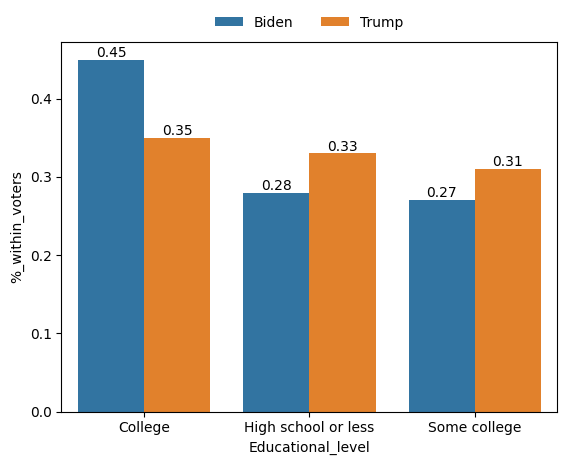

In [88]:
df_educ_voters = df[['Q30','educ']].value_counts().reset_index()
df_educ_voters = df_educ_voters[df_educ_voters['Q30'].isin([1,2])]
df_educ_voters['Q30'] = np.where(df_educ_voters['Q30'] == 1, 'Trump',
                            np.where(df_educ_voters['Q30'] == 2, 'Biden',''))
df_educ_voters = df_educ_voters.merge(df_educ_voters.groupby('Q30')['count'].sum(),on='Q30')
df_educ_voters.rename(columns={'Q30':'Intention_to_vote', 'educ':'Educational_level',
                       'count_x': 'Total_educ_candidate',
                       'count_y': 'Total_candidate_intentions'},inplace=True)
df_educ_voters['%_within_voters'] = (df_educ_voters['Total_educ_candidate']/df_educ_voters['Total_candidate_intentions']).round(2)
df_educ_voters = df_educ_voters[['Intention_to_vote','Educational_level','Total_educ_candidate','%_within_voters']]


p4 = sns.barplot(data=df_educ_voters, x='Educational_level', y='%_within_voters', hue='Intention_to_vote')
sns.move_legend(
    p4, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
for p in p4.containers:
    p4.bar_label(p, label_type='edge')

- How many people that supports Democrat and Republican will vote in the opposite party candidate?

In [22]:
df_perspective = df[['Q30','Q5']].value_counts().round(2).reset_index()
df_perspective['Q5'] = np.where (df_perspective['Q5'] == 1, 'Who wins the election matters',
                        np.where(df_perspective['Q5'] == 2, 'Things will be pretty much the same',
                        np.where(df_perspective['Q5'] == -1, 'NA','')))
df_perspective['Q30'] =  np.where(df_perspective['Q30']==1,'Republican',
                            np.where(df_perspective['Q30']==2,'Democrat',
                            np.where(df_perspective['Q30']==3,'Independent',
                            np.where(df_perspective['Q30']==4,'Another party',
                            np.where(df_perspective['Q30']==5,'No preference',
                            np.where(df_perspective['Q30']==-1,'NA',''))))))

df_perspective = df_perspective.merge(df_perspective.groupby('Q30')['count'].sum(),on='Q30')
df_perspective.rename(columns={'count_x': 'Count', 'count_y':'Total_count_party',
                              'Q30': 'Party_preference',
                              'Q5': 'Perspective of election result'},
                      inplace=True)
df_perspective['%_within_party'] = (df_perspective['Count']/df_perspective['Total_count_party']).round(2)
df_perspective.sort_values(by=['Party_preference','%_within_party'],ascending=[True,False],inplace=True)
df_perspective.groupby('Party_preference').first().sort_values('%_within_party',ascending=False)

,Perspective of election result,Count,Total_count_party,%_within_party
Party_preference,,,,
Democrat,Who wins the election matters,1820,2002,0.91
Republican,Who wins the election matters,1402,1592,0.88
Independent,Who wins the election matters,1129,1425,0.79
Another party,Who wins the election matters,64,99,0.65
No preference,Who wins the election matters,370,670,0.55
NA,Who wins the election matters,25,48,0.52


- Does it matter who will win the election based on the country issues? How is the opinion by party preference?

In [21]:
df_voting_preference = df[['Q30','Q23']].value_counts().reset_index()
df_voting_preference['Q23'] =  np.where(df_voting_preference['Q23']==1,'Trump',
                                        np.where(df_voting_preference['Q23']==2,'Biden',
                                        np.where(df_voting_preference['Q23']==3,'Incert',
                                        np.where(df_voting_preference['Q23']==-1,'NA',''))))

df_voting_preference['Q30'] =  np.where(df_voting_preference['Q30']==1,'Republican',
                                        np.where(df_voting_preference['Q30']==2,'Democrat',
                                        np.where(df_voting_preference['Q30']==3,'Independent',
                                        np.where(df_voting_preference['Q30']==4,'Another party',
                                        np.where(df_voting_preference['Q30']==5,'No preference',
                                        np.where(df_voting_preference['Q30']==-1,'NA',''))))))

df_voting_preference = df_voting_preference.merge(df_voting_preference.groupby('Q23')['count'].sum(),on='Q23')
df_voting_preference.rename(columns={'count_x': 'Count', 'count_y':'Total_party',
                                    'Q23': 'Intention_to_vote', 'Q30': 'Party_preference'},inplace=True)
df_voting_preference['%_within_party'] = (df_voting_preference['Count']/df_voting_preference['Total_party']).round(2)
df_voting_preference[((df_voting_preference['Party_preference'] == 'Democrat') & (df_voting_preference['Intention_to_vote'] == 'Trump'))
                    | ((df_voting_preference['Party_preference'] == 'Republican') & (df_voting_preference['Intention_to_vote'] == 'Biden'))]

,Party_preference,Intention_to_vote,Count,Total_party,%_within_party
10,Republican,Biden,95,2777,0.03
11,Democrat,Trump,45,1907,0.02


<hr>

<h3>5. What is considered a good American?</h3>

<h3>5.1) How important is displaying the American flag to being a good American?</h3>

In [39]:
df['Q2_4'].value_counts(normalize=True).round(2).rename(index={1:'Very important',
                                                               2:'Somewhat important',
                                                               3:'Not so important',
                                                               4:'Not at all important',
                                                               -1:'NA'})

Q2_4
Very important          0.34
Somewhat important      0.28
Not so important        0.23
Not at all important    0.15
NA                      0.01
Name: proportion, dtype: float64

- How is the proportion by gender, race, education and party preference of the two extreme opinions?

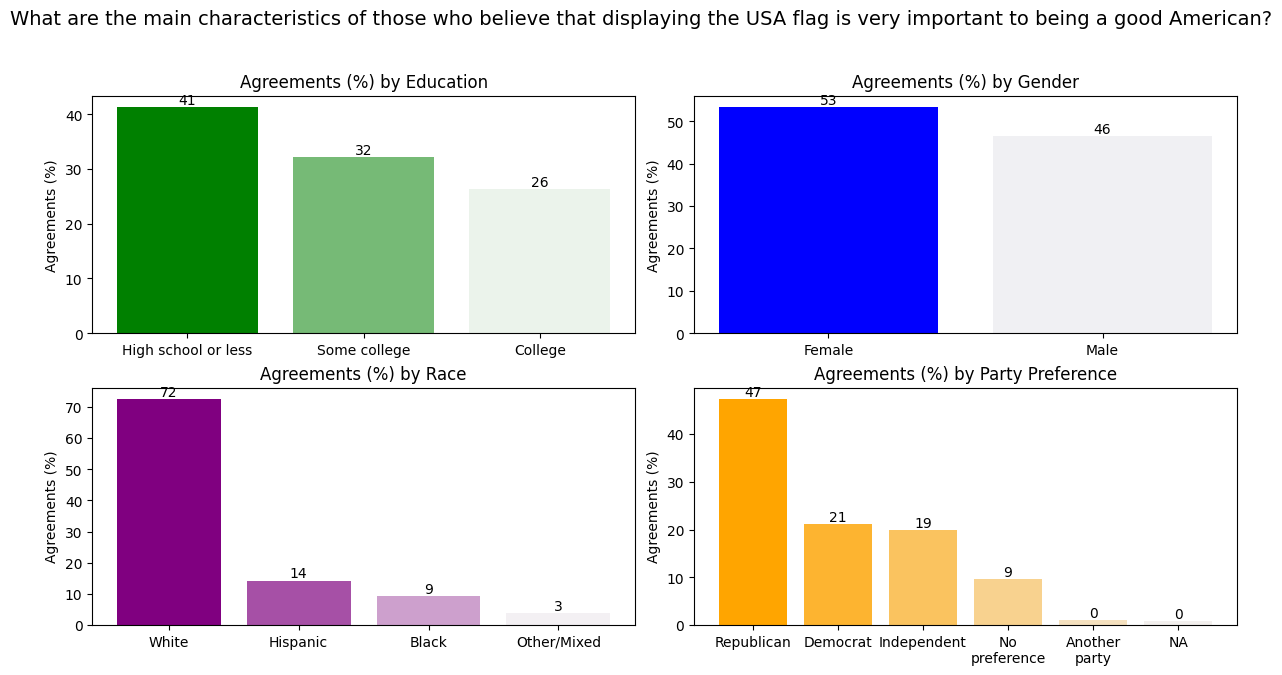

In [40]:
# Contar as ocorrências normalizadas
df_flag_gender_valuecounts = df.loc[:,['gender', 'race', 'educ', 'Q30', 'Q2_4']]

# Mapeando os valores de Q2_4
df_flag_gender_valuecounts['Q2_4'] = np.where(df_flag_gender_valuecounts['Q2_4'] == 1, 'Very important',
                                  np.where(df_flag_gender_valuecounts['Q2_4'] == 2, 'Somewhat important',
                                  np.where(df_flag_gender_valuecounts['Q2_4'] == 3, 'Not so important',
                                  np.where(df_flag_gender_valuecounts['Q2_4'] == 4, 'Not at all important',
                                  np.where(df_flag_gender_valuecounts['Q2_4'] == -1, 'NA','')))))

# Mapeando os valores de Q30
df_flag_gender_valuecounts['Q30'] = np.where(df_flag_gender_valuecounts['Q30'] == 1, 'Republican',
                                        np.where(df_flag_gender_valuecounts['Q30'] == 2, 'Democrat',
                                        np.where(df_flag_gender_valuecounts['Q30'] == 3, 'Independent',
                                        np.where(df_flag_gender_valuecounts['Q30'] == 4, 'Another party',
                                        np.where(df_flag_gender_valuecounts['Q30'] == 5, 'No preference',
                                        np.where(df_flag_gender_valuecounts['Q30'] == -1, 'NA',''))))))

df_flag_gender_valuecounts = df_flag_gender_valuecounts[df_flag_gender_valuecounts['Q2_4'] == 'Very important']
df_flag_gender_valuecounts = df_flag_gender_valuecounts.value_counts(normalize=True).reset_index()
df_flag_gender_valuecounts = df_flag_gender_valuecounts.rename(columns={
    'gender': 'Gender',
    'race': 'Race',
    'educ': 'Education_level',
    'Q30': 'Party_preference',
    'Q2_4': 'Flag_importance',
    'proportion': 'Qty_opinion'  
})

df_flag_gender_valuecounts['Qty_opinion'] = df_flag_gender_valuecounts['Qty_opinion'] * 100 


# -----------------------------------------------------------------
# Customized colors and layout for the graphs
colors = sns.color_palette("Set2", 4)
fig, axs = plt.subplots(2, 2, figsize=(12, 6), constrained_layout=True)
fig.suptitle('What are the main characteristics of those who believe that displaying the USA flag is very important to being a good American?', 
             fontsize=14, ha='center', y=1.10)

# 1. Graph for Education_level
edu_counts = df_flag_gender_valuecounts.groupby('Education_level')['Qty_opinion'].sum().sort_values(ascending=False)
edu_colors = sns.light_palette("green", n_colors=len(edu_counts), reverse=True)
axs[0, 0].bar(edu_counts.index, edu_counts, color=edu_colors)

axs[0, 0].set_title('Agreements (%) by Education')
axs[0, 0].set_ylabel('Agreements (%)')
axs[0, 0].set_xticks(range(len(edu_counts)))
axs[0, 0].set_xticklabels(edu_counts.index, rotation=0)

for index, value in enumerate(edu_counts):
    axs[0, 0].text(index, value, f'{int(value)}', ha='center', va='bottom')

# 2. Graph for Gender
gender_counts = df_flag_gender_valuecounts.groupby('Gender')['Qty_opinion'].sum().sort_values(ascending=False)
gender_colors = sns.light_palette("blue", n_colors=len(gender_counts), reverse=True)
axs[0, 1].bar(gender_counts.index, gender_counts, color=gender_colors)

axs[0, 1].set_title('Agreements (%) by Gender')
axs[0, 1].set_ylabel('Agreements (%)')
axs[0, 1].set_xticks(range(len(gender_counts)))
axs[0, 1].set_xticklabels(gender_counts.index, rotation=0)

for index, value in enumerate(gender_counts):
    axs[0, 1].text(index, value, f'{int(value)}', ha='center', va='bottom')

# 3. Graph for Race
race_counts = df_flag_gender_valuecounts.groupby('Race')['Qty_opinion'].sum().sort_values(ascending=False)
race_colors = sns.light_palette("purple", n_colors=len(race_counts), reverse=True)
axs[1, 0].bar(race_counts.index, race_counts, color=race_colors)

axs[1, 0].set_title('Agreements (%) by Race')
axs[1, 0].set_ylabel('Agreements (%)')
axs[1, 0].set_xticks(range(len(race_counts)))
axs[1, 0].set_xticklabels(race_counts.index, rotation=0)

for index, value in enumerate(race_counts):
    axs[1, 0].text(index, value, f'{int(value)}', ha='center', va='bottom')

# 4. Graph for Party_preference with line breaks in the labels
party_counts = df_flag_gender_valuecounts.groupby('Party_preference')['Qty_opinion'].sum().sort_values(ascending=False)
party_colors = sns.light_palette("orange", n_colors=len(party_counts), reverse=True)

# Adding the bars
axs[1, 1].bar(party_counts.index, party_counts, color=party_colors)

axs[1, 1].set_title('Agreements (%) by Party Preference')
axs[1, 1].set_ylabel('Agreements (%)')

# Adjusting the X-axis labels with line breaks
party_labels = [label.replace(' ', '\n') for label in party_counts.index]
axs[1, 1].set_xticks(range(len(party_counts)))
axs[1, 1].set_xticklabels(party_labels, rotation=0)

# Adding the values on the bars
for index, value in enumerate(party_counts):
    axs[1, 1].text(index, value, f'{int(value)}', ha='center', va='bottom')

# Display the graph
plt.show()

<h3>5.2 How important is believing in God important to being a good American?</h3>

In [5]:
df['Q2_9'].value_counts(normalize=True).round(2).rename(index={
                                                    1:'Very important',
                                                    2:'Somewhat important',
                                                    3:'Not so important',
                                                    4:'Not at all important',
                                                    -1:'NA'})

Q2_9
Very important          0.47
Not at all important    0.22
Somewhat important      0.16
Not so important        0.14
NA                      0.01
Name: proportion, dtype: float64

- What's the main opinion by educational level about believing in God to be a good American?

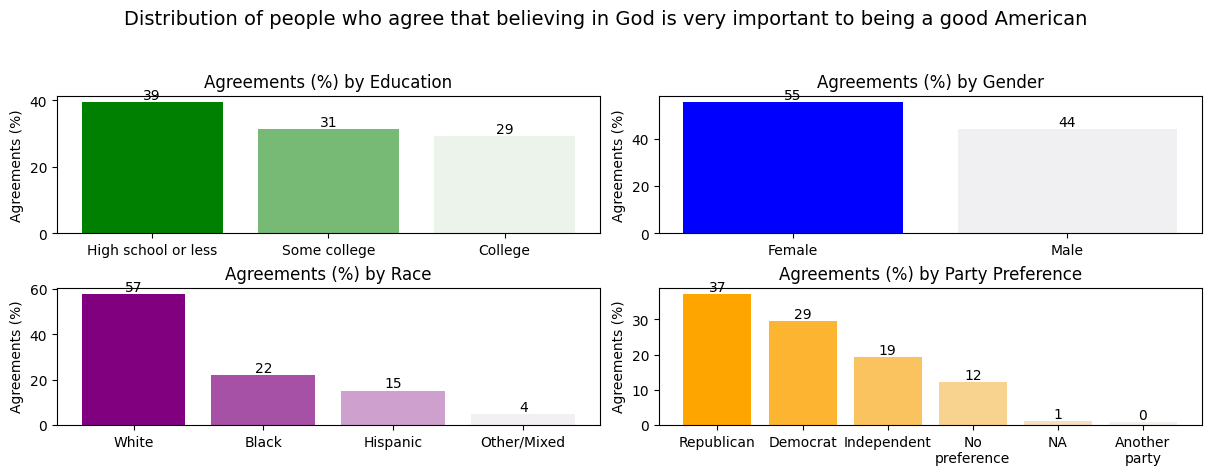

In [42]:
df_educ_god_valuecounts = df.loc[:, ['educ', 'gender', 'race', 'Q30', 'Q2_9']]

df_educ_god_valuecounts['Q2_9'] = np.where(df_educ_god_valuecounts['Q2_9'] == 1, 'Very important',
                                  np.where(df_educ_god_valuecounts['Q2_9'] == 2, 'Somewhat important',
                                  np.where(df_educ_god_valuecounts['Q2_9'] == 3, 'Not so important',
                                  np.where(df_educ_god_valuecounts['Q2_9'] == 4, 'Not at all important',
                                  np.where(df_educ_god_valuecounts['Q2_9'] == -1, 'NA','')))))

df_educ_god_valuecounts['Q30'] = np.where(df_educ_god_valuecounts['Q30'] == 1, 'Republican',
                                    np.where(df_educ_god_valuecounts['Q30'] == 2, 'Democrat',
                                    np.where(df_educ_god_valuecounts['Q30'] == 3, 'Independent',
                                    np.where(df_educ_god_valuecounts['Q30'] == 4, 'Another party',
                                    np.where(df_educ_god_valuecounts['Q30'] == 5, 'No preference',
                                    np.where(df_educ_god_valuecounts['Q30'] == -1, 'NA',''))))))

df_educ_god_valuecounts = df_educ_god_valuecounts[df_educ_god_valuecounts['Q2_9'] == 'Very important']
df_educ_god_valuecounts = df_educ_god_valuecounts.value_counts(normalize=True).reset_index()
df_educ_god_valuecounts = df_educ_god_valuecounts.rename(columns={
    'educ': 'Education_level',
    'gender': 'Gender',
    'race': 'Race',
    'Q30': 'Party_preference',
    'Q2_9': 'God_importance',
    'proportion': 'Qty_opinion'  
})

df_educ_god_valuecounts['Qty_opinion'] = df_educ_god_valuecounts['Qty_opinion'] * 100

# -----------------------------------------------------------------
# Create the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 4), constrained_layout=True) 

fig.suptitle('Distribution of people who agree that believing in God is very important to being a good American', 
             fontsize=14, ha='center', y=1.15)

# Gradient colors for each plot (darkest to lightest)
edu_colors = sns.light_palette("green", n_colors=len(df_educ_god_valuecounts['Education_level'].unique()), reverse=True)
gender_colors = sns.light_palette("blue", n_colors=len(df_educ_god_valuecounts['Gender'].unique()), reverse=True)
race_colors = sns.light_palette("purple", n_colors=len(df_educ_god_valuecounts['Race'].unique()), reverse=True)
party_colors = sns.light_palette("orange", n_colors=len(df_educ_god_valuecounts['Party_preference'].unique()), reverse=True)

# Education_level graph
edu_counts = df_educ_god_valuecounts.groupby('Education_level')['Qty_opinion'].sum().sort_values(ascending=False)
for index, (value, color) in enumerate(zip(edu_counts, edu_colors)):
    axs[0, 0].bar(index, value, color=color)
axs[0, 0].set_title('Agreements (%) by Education')
axs[0, 0].set_ylabel('Agreements (%)')
axs[0, 0].tick_params(axis='x', rotation=0)
axs[0, 0].set_xticks(range(len(edu_counts)))  # Add this line
axs[0, 0].set_xticklabels(edu_counts.index, rotation=0)  # Add this line
for index, value in enumerate(edu_counts):
    axs[0, 0].text(index, value, f'{int(value)}', ha='center', va='bottom')

# Gender graph
gender_counts = df_educ_god_valuecounts.groupby('Gender')['Qty_opinion'].sum().sort_values(ascending=False)
for index, (value, color) in enumerate(zip(gender_counts, gender_colors)):
    axs[0, 1].bar(index, value, color=color)
axs[0, 1].set_title('Agreements (%) by Gender')
axs[0, 1].set_ylabel('Agreements (%)')
axs[0, 1].tick_params(axis='x', rotation=0)
axs[0, 1].set_xticks(range(len(gender_counts)))  # Add this line
axs[0, 1].set_xticklabels(gender_counts.index, rotation=0)  # Add this line
for index, value in enumerate(gender_counts):
    axs[0, 1].text(index, value, f'{int(value)}', ha='center', va='bottom')

# Race graph
race_counts = df_educ_god_valuecounts.groupby('Race')['Qty_opinion'].sum().sort_values(ascending=False)
for index, (value, color) in enumerate(zip(race_counts, race_colors)):
    axs[1, 0].bar(index, value, color=color)
axs[1, 0].set_title('Agreements (%) by Race')
axs[1, 0].set_ylabel('Agreements (%)')
axs[1, 0].tick_params(axis='x', rotation=0)
axs[1, 0].set_xticks(range(len(race_counts)))  # Add this line
axs[1, 0].set_xticklabels(race_counts.index, rotation=0)  # Add this line
for index, value in enumerate(race_counts):
    axs[1, 0].text(index, value, f'{int(value)}', ha='center', va='bottom')

# Party_preference graph
party_counts = df_educ_god_valuecounts.groupby('Party_preference')['Qty_opinion'].sum().sort_values(ascending=False)
for index, (value, color) in enumerate(zip(party_counts, party_colors)):
    axs[1, 1].bar(index, value, color=color)
axs[1, 1].set_title('Agreements (%) by Party Preference')
axs[1, 1].set_ylabel('Agreements (%)')

# Formatting x-axis labels for Party_preference
labels = [label.replace(' ', '\n') for label in party_counts.index]
axs[1, 1].set_xticks(range(len(labels)))
axs[1, 1].set_xticklabels(labels)

for index, value in enumerate(party_counts):
    axs[1, 1].text(index, value, f'{int(value)}', ha='center', va='bottom')

plt.show()

<hr>

<h3>Conclusions</h3>

- The sample has 5,836 interviewed individuals, with an average age of 51. The sample was almost evenly split between genders, with 63% identifying as White, 40% holding a college degree, and nearly evenly divided into four income groups, with the wealthiest earning above $125k and the poorest earning under $40k.<br>
- 44% of the sample vote sporadically, 31% always, and 25% rarely or never. More educated groups tended to vote more.<br>
- The "Other/mixed race" race has the wealthiest income group (above 125k) as the most representative. Black category is the only one where the most representative group earns less than $40k.<br>
- Among the most representative income categories within each educational level, the college graduates are the wealthiest, while the less educated group is the poorest across all educational levels.<br>
- Voters who vote rarely or never are the only group where the lowest educational level is the most representative.<br>
- Among all party preference groups, Republicans have the lowest percentage of college graduates, at 35%, followed by Democrats at 45%.<br>
- People who intended to vote for Trump has age average of 54, and 52 for Biden.
- More Republicans intended to vote for Biden than Democrats did for Trump.<br>
- 91% of Democratic voters believe that the election result is important, compared to 88% of Republicans.<br>
- For 34% of those interviewed, displaying the American flag is a very important sign of being a good American. Women, white, the least educated group and Republicans are the most likely to agree with this.<br>
- For 47% of those interviewed, believing in God is a very important sign of being a good American. Women, white, the least educated and Republicans are more likely to agree with this.<br>
- The age mean of people who intended to vote was higher than the other intentions.
- Among people who did not intend to vote in 2020 (8%), 22% did not plan to vote because they did not believe that the political system would serve their needs, and 21% did not think their vote mattered.<br>

<hr>